Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8762 - loss: 0.4383
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9625 - loss: 0.1251
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9765 - loss: 0.0802
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9821 - loss: 0.0586
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9863 - loss: 0.0431
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0921
Test Accuracy: 0.9757000207901001
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


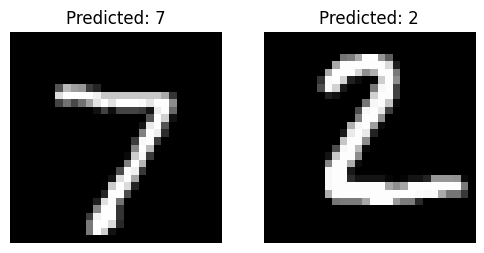

In [4]:
# Import TensorFlow and Keras libraries for building neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Import matplotlib for displaying images
import matplotlib.pyplot as plt
# Load the MNIST handwritten digit dataset
# x_train, x_test → image data
# y_train, y_test → corresponding labels (0–9)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Normalize pixel values from 0–255 to 0–1 for better training
x_train = x_train / 255.0
x_test = x_test / 255.0
# Build a Sequential Neural Network model
model = Sequential([
    # Flatten 28x28 image into a 1D vector of size 784
    Flatten(input_shape=(28, 28)),
    # Fully connected hidden layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),
    # Output layer with 10 neurons (digits 0–9) and softmax activation
    Dense(10, activation='softmax')
])
# Compile the model using Adam optimizer and categorical loss function
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Train the model using training data
model.fit(x_train, y_train, epochs=5, batch_size=32)
# Evaluate the trained model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)
# Predict digit classes for test images
predictions = model.predict(x_test)
# Select indices of test images to display
indices = [0, 1]
# Create a figure to display predictions
plt.figure(figsize=(6, 3))
# Display images along with predicted digit
for i, index in enumerate(indices):
    plt.subplot(1, 2, i + 1)
    plt.imshow(x_test[index], cmap='gray')
    plt.title("Predicted: " + str(predictions[index].argmax()))
    plt.axis('off')
# Show the output images
plt.show()